In [1]:
#import the standard libraries
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=[8,3]
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels
import scipy
from scipy.stats import pearsonr
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
#Read the data using the padnas 
data=pd.read_csv('/content/global_temps.csv')
data.head()

,Source,Date,Mean
0,GCAG,2016-12-06,0.7895
1,GISTEMP,2016-12-06,0.8100
2,GCAG,2016-11-06,0.7504
3,GISTEMP,2016-11-06,0.9300
4,GCAG,2016-10-06,0.7292


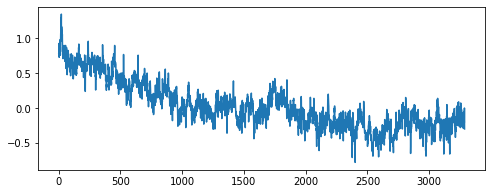

In [3]:
data['Mean'].plot()

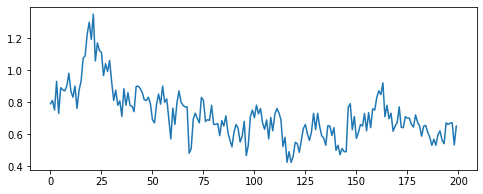

In [4]:
data['Mean'][:200].plot()

In [5]:
df=data.pivot(index='Date',columns='Source',values='Mean')
df.head()

Source,GCAG,GISTEMP
Date,,
1880-01-06,0.0009,-0.30
1880-02-06,-0.1229,-0.21
1880-03-06,-0.1357,-0.18
1880-04-06,-0.0499,-0.27
1880-05-06,-0.0738,-0.14


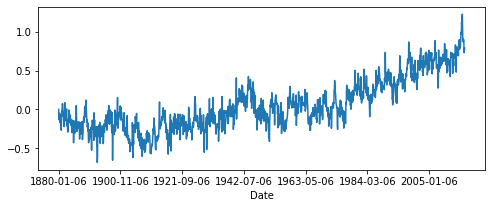

In [6]:
df.GCAG.plot()

In [7]:
type(df.index)

pandas.core.indexes.base.Index

In [8]:
df.index=pd.to_datetime(df.index)

In [9]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

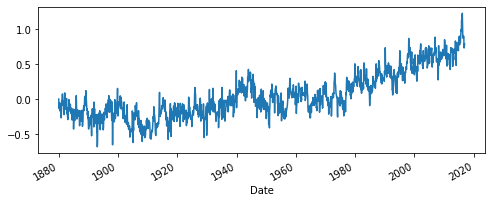

In [10]:
df.GCAG.plot()

In [11]:
df['1880']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


Source,GCAG,GISTEMP
Date,,
1880-01-06,0.0009,-0.30
1880-02-06,-0.1229,-0.21
1880-03-06,-0.1357,-0.18
1880-04-06,-0.0499,-0.27
1880-05-06,-0.0738,-0.14
1880-06-06,-0.1692,-0.29
1880-07-06,-0.1491,-0.24
1880-08-06,-0.0725,-0.08
1880-09-06,-0.0817,-0.17


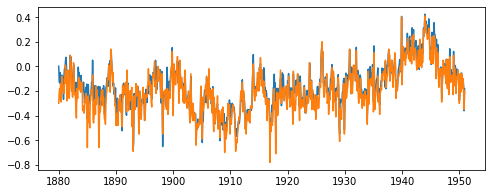

In [12]:
plt.plot(df['1880':'1950'][['GCAG',	'GISTEMP']])

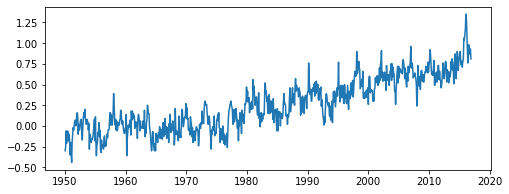

In [13]:
plt.plot(df['1950':][	'GISTEMP'])

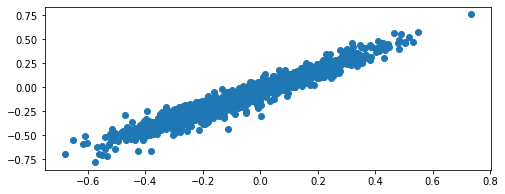

In [14]:
plt.scatter(df['1880':'1990'][['GCAG']],df['1880':'1990'][['GISTEMP']])

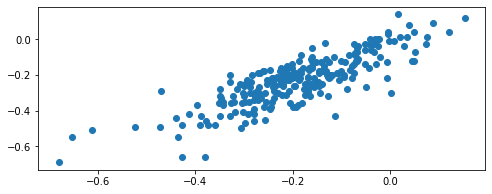

In [15]:
plt.scatter(df['1880':'1899'][['GCAG']],df['1880':'1899'][['GISTEMP']])

In [16]:
pearsonr(df['1880':'1899'].GCAG,df['1881':'1900'].GISTEMP)

(0.1546405732961276, 0.01650223473095511)

In [17]:
df['1880':'1899'][['GCAG']].head()

Source,GCAG
Date,
1880-01-06,0.0009
1880-02-06,-0.1229
1880-03-06,-0.1357
1880-04-06,-0.0499
1880-05-06,-0.0738


In [18]:
df['1881':'1900'][['GISTEMP']].head()

Source,GISTEMP
Date,
1881-01-06,-0.10
1881-02-06,-0.14
1881-03-06,0.01
1881-04-06,-0.03
1881-05-06,-0.04


In [19]:
print(min(df.index))
print(max(df.index))

1880-01-06 00:00:00
2016-12-06 00:00:00


In [20]:
train=df['1960':]

In [21]:
# smooth trend model without seasonal or cyclical components
model = {
    'level': 'smooth trend', 'cycle': False, 'seasonal': None, 
}

In [22]:
modeling=sm.tsa.UnobservedComponents(train['GCAG'],**model)
result=modeling.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/structural.py:1722: RuntimeWarning: invalid value encountered in sqrt
  std_errors = np.sqrt(component_bunch['%s_cov' % which])


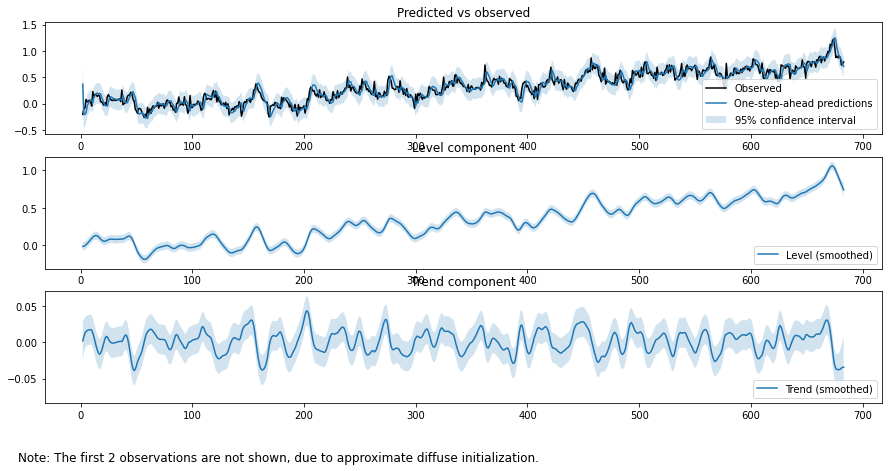

In [23]:
fig=result.plot_components(legend_loc='lower right',figsize=(15,7))

In [24]:
num_steps=20
predict_res=result.get_prediction(dynamic=train['GCAG'].shape[0]-num_steps)
predict=predict_res.predicted_mean
ci=predict_res.conf_int()

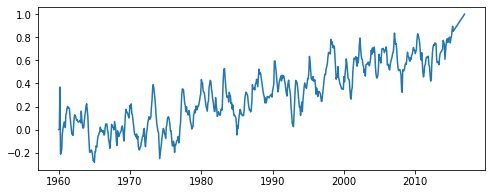

In [25]:
plt.plot(predict)

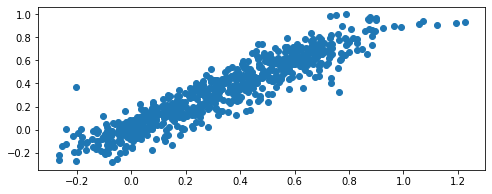

In [26]:
plt.scatter(train['GCAG'],predict)

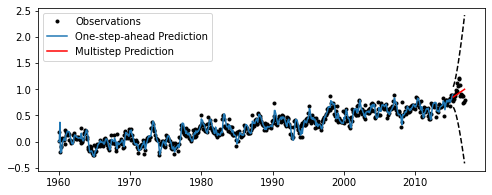

In [27]:
fig, ax = plt.subplots()
# Plot the results
ax.plot(train['GCAG'], 'k.', label='Observations');
ax.plot(train.index[:-num_steps], predict[:-num_steps], label='One-step-ahead Prediction');

ax.plot(train.index[-num_steps:], predict[-num_steps:], 'r', label='Multistep Prediction');
ax.plot(train.index[-num_steps:], ci.iloc[-num_steps:], 'k--');

# Cleanup the image
legend = ax.legend(loc='upper left');

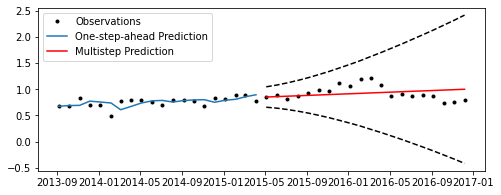

In [28]:
fig, ax = plt.subplots()
# Plot the results
ax.plot(train.index[-40:], train['GCAG'][-40:], 'k.', label='Observations');
ax.plot(train.index[-40:-num_steps], predict[-40:-num_steps], label='One-step-ahead Prediction');

ax.plot(train.index[-num_steps:], predict[-num_steps:], 'r', label='Multistep Prediction');
ax.plot(train.index[-num_steps:], ci.iloc[-num_steps:], 'k--');

# Cleanup the image
legend = ax.legend(loc='upper left');

In [29]:
seasonal_model = {
    'level': 'local linear trend',
    'seasonal': 12
}
mod = sm.tsa.UnobservedComponents(train['GCAG'], **seasonal_model)
res = mod.fit(method='powell', disp=False)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/structural.py:1681: MatplotlibDeprecationWarning: Unrecognized location 'lower'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  ax.legend(handles, labels, loc=legend_loc)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/structural.py:1722: RuntimeWarning: invalid value encountered in sqrt
  std_errors = np.sqrt(component_bunch['%s_cov' % which])
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/structural.py:1732: MatplotlibDeprecationWarning: Unrecognized location 'lower'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  ax.legend(loc=legend_loc)
/usr/local/lib/python3.7/

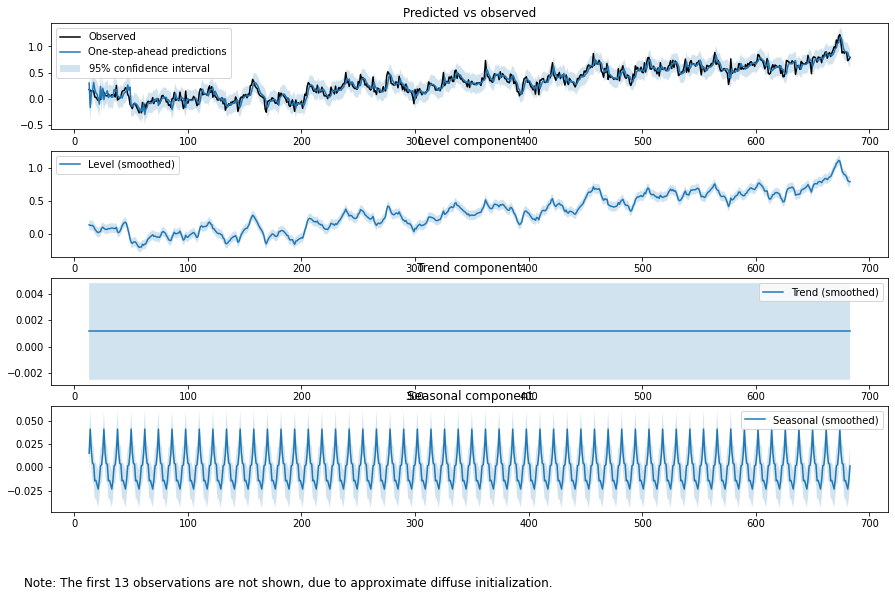

In [30]:
fig=res.plot_components(legend_loc='lower',figsize=(15,9))

In [31]:
pearsonr(result.predict(), train['GCAG'])

(0.9376554612284693, 3.16463779e-315)

In [32]:
np.mean(np.abs(res.predict() - train['GCAG']))

0.07203426252004273

In [33]:
seasonal_model = {
    'level': 'local level',
    'seasonal': 12
}
llmod = sm.tsa.UnobservedComponents(train['GCAG'], **seasonal_model)
ll_level_res = llmod.fit(method='powell', disp=False)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/structural.py:1722: RuntimeWarning: invalid value encountered in sqrt
  std_errors = np.sqrt(component_bunch['%s_cov' % which])
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/structural.py:1722: RuntimeWarning: invalid value encountered in sqrt
  std_errors = np.sqrt(component_bunch['%s_cov' % which])


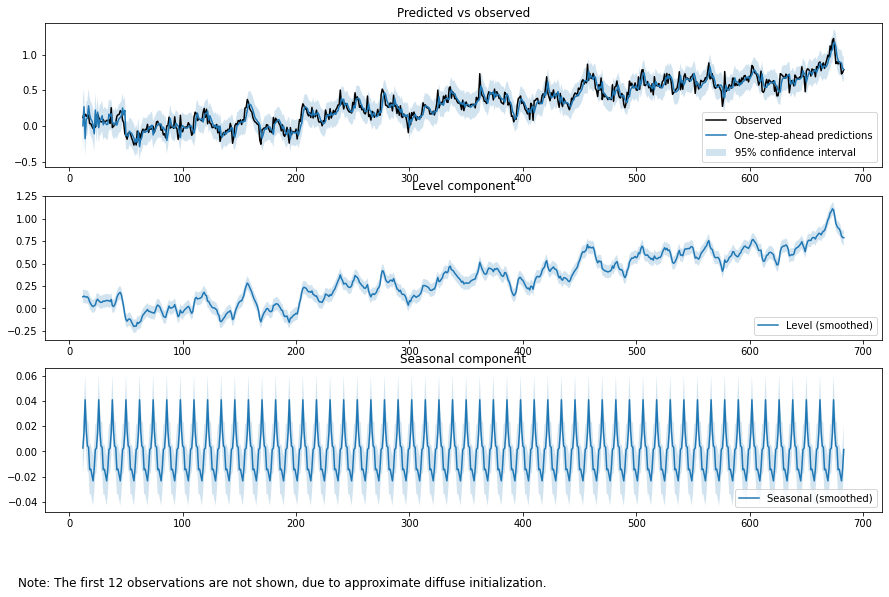

In [34]:
fig = ll_level_res.plot_components(legend_loc='lower right', figsize=(15, 9));

In [35]:
np.mean(np.abs(ll_level_res.predict() - train['GCAG']))

0.07157760213054734

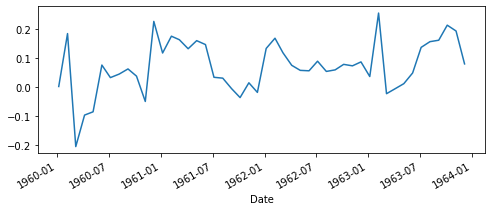

In [36]:
train[:48].GCAG.plot()

In [37]:
pearsonr(ll_level_res.predict(), train['GCAG'])

(0.9450047543118477, 0.0)

In [38]:
pearsonr(train['GCAG'].iloc[:-1, ], train['GCAG'].iloc[1:, ])

(0.9403611903118237, 4.01e-321)

In [39]:
np.mean(np.abs(ll_level_res.predict() - train['GCAG']))

0.07157760213054734

In [40]:
np.mean(np.abs(train['GCAG'].iloc[:-1, ].values, train['GCAG'].iloc[1:, ].values))

0.3475446559297218